### Heuristic Models
Look at the Seattle weather in the **data** folder. Come up with a heuristic model to predict if it will rain today. Keep in mind this is a time series, which means that you only know what happened historically (before a given date). One example of a heuristic model is: It will rain tomorrow if it rained more than 1 inch (>1.0 PRCP) today. Describe your heuristic model in the next cell.

**your model here**  

Examples:  

If rained yesterday it will rain today.  
If it rained yesterday or the day before it will rain today.

In [1]:
#here is an example of how to build and populate a hurestic model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

df = pd.read_csv('seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold 100 values
heuristic_df = pd.DataFrame({'yesterday':[0.0]*numrows,
                             'today':[0.0]*numrows,
                             'tomorrow':[0.0]*numrows,
                             'guess':[False]*numrows, #logical guess
                             'rain_tomorrow':[False]*numrows, #historical observation
                             'correct':[False]*numrows}) #TRUE if your guess matches the historical observation

#sort columns for convience
seq = ['yesterday','today','tomorrow','guess','rain_tomorrow','correct']
heuristic_df = heuristic_df.reindex(columns=seq)

In [2]:
df.head()

DATE  PRCP  TMAX  TMIN  RAIN
0  1948-01-01  0.47    51    42  True
1  1948-01-02  0.59    45    36  True
2  1948-01-03  0.42    45    35  True
3  1948-01-04  0.31    45    34  True
4  1948-01-05  0.17    45    32  True

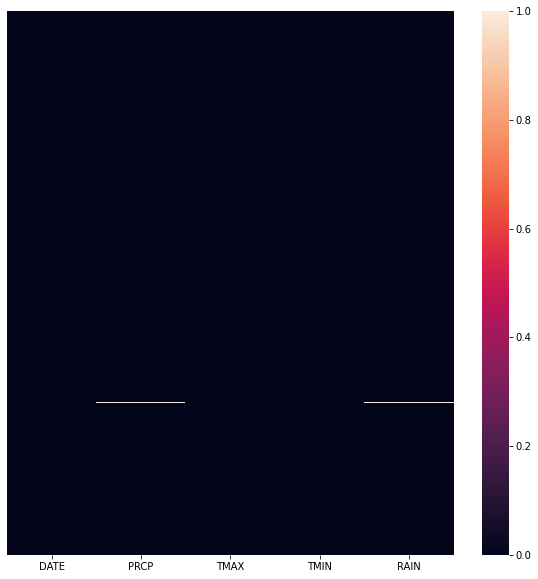

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(df),yticklabels=False)

In [4]:
df[pd.isnull(df['PRCP'])]

DATE  PRCP  TMAX  TMIN RAIN
18415  1998-06-02   NaN    72    52  NaN
18416  1998-06-03   NaN    66    51  NaN
21067  2005-09-05   NaN    70    52  NaN

In [5]:
df[pd.isnull(df['RAIN'])]

DATE  PRCP  TMAX  TMIN RAIN
18415  1998-06-02   NaN    72    52  NaN
18416  1998-06-03   NaN    66    51  NaN
21067  2005-09-05   NaN    70    52  NaN

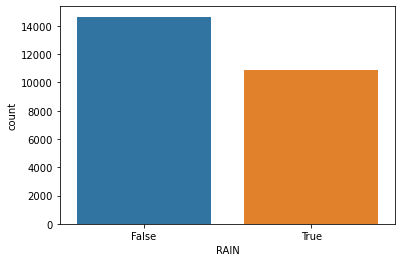

In [6]:
sns.countplot(data=df, x='RAIN')

In [7]:
df['PRCP'].mean()

0.10622162204477956

In [8]:
def RAIN_INSERTION(cols):
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return 'False'
    else:
        return RAIN

In [9]:
def PRCP_INSERTION(col):
    PRCP=col[0]
    if pd.isnull(PRCP):
        return df['PRCP'].mean()
    else:
        return PRCP

In [10]:
df['RAIN']=df[['RAIN']].apply(RAIN_INSERTION,axis=1)

In [11]:
df['PRCP']=df[['PRCP']].apply(PRCP_INSERTION,axis=1)

In [12]:
df[pd.isnull(df['RAIN'])]

Empty DataFrame
Columns: [DATE, PRCP, TMAX, TMIN, RAIN]
Index: []

In [13]:
df[pd.isnull(df['PRCP'])]

Empty DataFrame
Columns: [DATE, PRCP, TMAX, TMIN, RAIN]
Index: []

## EDA

Text(0.5, 1.0, 'Precipitation Vs Minimum Temperature')

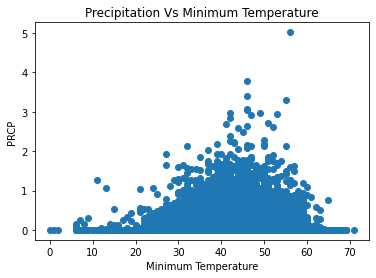

In [14]:
plt.scatter(x='TMIN',y='PRCP',data=df)
plt.xlabel('Minimum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Minimum Temperature')

Text(0.5, 1.0, 'Precipitation Vs Maximum Temperature')

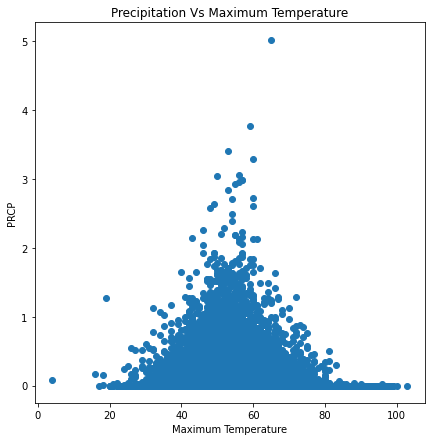

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(x='TMAX',y='PRCP',data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Maximum Temperature')


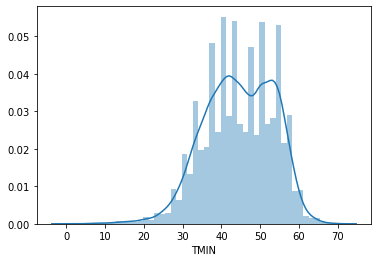

In [16]:
sns.distplot(df['TMIN'])

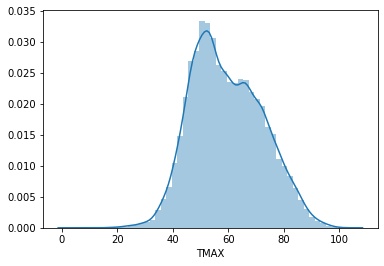

In [17]:
sns.distplot(df['TMAX'])

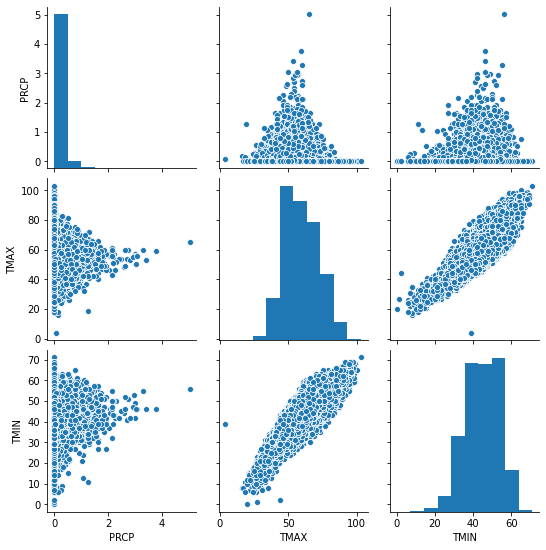

In [18]:
sns.pairplot(data=df)

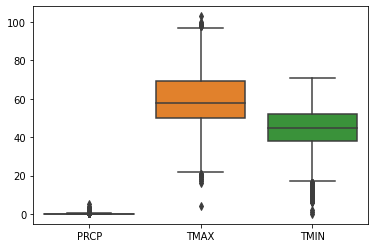

In [19]:
#plt.figure(figsize=(10,7))
sns.boxplot(data=df)

In [20]:
#Dropping the outliers from TMIN column
df=df.drop(df[df['TMIN']<17 ].index)


In [21]:
#Dropping the outliers from TMAX columns i.e. the value more than 100
df=df.drop(df[(df['TMAX']>97.5) | (df['TMAX']< 21.5)].index)


In [22]:
#Dropping the outliers from PRCP columns i.e. the value more than 0.275
df=df.drop(df[(df['PRCP']>0.25) | (df['PRCP']< -0.15) ].index)

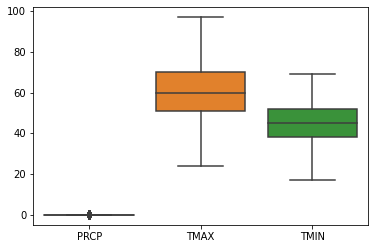

In [23]:
sns.boxplot(data=df)


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr= LogisticRegression()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=df.drop(['RAIN','DATE'],axis=1)
y=df['RAIN']
y=y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
prediction=lr.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print('Confusion Matrix',confusion_matrix(y_test,prediction))
print('\n')
print('Classification Report',classification_report(y_test,prediction))

Confusion Matrix [[4363   23]
 [ 515 1667]]


Classification Report               precision    recall  f1-score   support

       False       0.89      0.99      0.94      4386
        True       0.99      0.76      0.86      2182

    accuracy                           0.92      6568
   macro avg       0.94      0.88      0.90      6568
weighted avg       0.92      0.92      0.92      6568



# Quantitative Models:

### 1-Training and test datasets: 

randomly selected subsets of the total data available, can use scikit-learn

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['RAIN'] , test_size=.8)

In [33]:
y_test

2144      True
1407     False
14019    False
8421      True
5671     False
         ...  
17228    False
10902     True
19882     True
15315    False
9544      True
Name: RAIN, Length: 17515, dtype: object

### 2-Learning rate:

The size of step each iteration of gradient descent can take (typically smaller to avoid oscillation but not too small to avoid slow learning). Usually called alpha.

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

In [35]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [45]:
X1 , Y =train_test_split(df, test_size=.8)

In [37]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [38]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs  #SGD class has an argument called decay. This argument is used in the time-based learning
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [52]:
model.fit(X1, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

###  3-Number of Iterations: 

The number of gradient descent steps to take against the training dataset. Often be referred to as epochs.

###  4-Normalization: 

Raw data is scaled to values that are much different between features. For example, 'square feet' and 'average selling price of a home' are orders of magnitude different. These differences can slow gradient descent. Normalization re-scales the features into a range that is the same (or similar enough) for all features. 

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)

X_test_norm = norm.transform(X_test)

### 5-Regularization: 

Methods to adapt models in a way that helps reduce the variance in performance between training and test data sets

In [63]:
from keras.regularizers import l1

In [ ]:
reg = l1(0.001)
model.add(Dense(32, activation='relu', activity_regularizer=l1(0.001)))
model.add(Dense(32, activation='linear', activity_regularizer=l1(0.001)))
model.add(Activation('relu'))


In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)